<a href="https://colab.research.google.com/github/JIJASH/data_mining_and_warehousing/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab -1 :
- Extract the price history of ten commercial banks from the given api.
  https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2025-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241

- Save the data in .csv format.
- Clean the data if necessary.
- Convert the daily to weekly format and plot it.
- Convert the data to monthly format and plot it.
- Calculate the following technical indicators from the data and plot them.
  - Moving Average
  - Weighted Moving Average
  - RSI
  - OBV
  - CCI




### importing necessary libraries



In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### take user input for bank symbols

In [21]:
symbol = input("Enter Bank Symbol (e.g., ADBL, NICA): ").strip().upper()
start_date = "2025-04-19"
end_date = "2025-05-19"
csv_file = f"/content/drive/MyDrive/data mining and warehousing/{symbol}_stock_history.csv"

Enter Bank Symbol (e.g., ADBL, NICA): nica


### Fetch and save the data

In [22]:
def fetch_stock_data(symbol, start_date, end_date):
    url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={start_date}&toDate={end_date}&pageNo=1&itemsPerPage=1000&pagePerDisplay=5"
    response = requests.get(url)
    data = response.json()
    stock_data = data.get("result", {}).get("data", [])
    if not stock_data:
        print(f"No data found for {symbol}.")
        return None
    df = pd.DataFrame(stock_data)
    df.to_csv(csv_file, index=False)
    return df

df = fetch_stock_data(symbol, start_date, end_date)
if df is None:
    raise SystemExit("Exiting as no data was found.")

In [23]:
df

,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,0,2025-05-27T00:00:00,2025-05-27,364.0,355.0,360.50,0,36123,12990114.3,362.83,-2.33,-0.64
1,2,2025-05-19T00:00:00,2025-05-19,344.0,336.0,340.13,393,76308,25907663.6,337.51,2.62,0.78
2,3,2025-05-18T00:00:00,2025-05-18,343.8,335.5,337.51,670,111931,37864933.3,341.58,-4.07,-1.19
3,4,2025-05-15T00:00:00,2025-05-15,348.0,339.9,341.58,666,143396,48950682.0,346.24,-4.66,-1.35
4,5,2025-05-14T00:00:00,2025-05-14,351.0,345.3,346.24,234,27056,9387814.0,347.21,-0.97,-0.28
5,6,2025-05-13T00:00:00,2025-05-13,352.0,344.0,347.21,409,69156,23945061.6,349.98,-2.77,-0.79
6,7,2025-05-11T00:00:00,2025-05-11,359.0,345.3,349.98,323,55925,19630604.6,352.29,-2.31,-0.66
7,8,2025-05-08T00:00:00,2025-05-08,359.0,347.0,352.29,414,84006,29467684.0,358.27,-5.98,-1.67
8,9,2025-05-07T00:00:00,2025-05-07,360.0,340.1,358.27,334,51281,17910366.3,344.23,14.04,4.08
9,10,2025-05-06T00:00:00,2025-05-06,350.0,342.1,344.23,404,61181,21072613.9,348.79,-4.56,-1.31


### clean and prepare the data

In [24]:
df = pd.read_csv(csv_file, parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)
df.dropna(inplace=True)

In [25]:
df

,sn,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
tradeDate,,,,,,,,,,,
2025-04-20,21,2025-04-20,375.5,369.0,369.81,680,122259,45413718.4,383.07,-13.26,-3.46
2025-04-21,20,2025-04-21,370.0,362.8,363.72,510,128678,47123111.3,369.81,-6.09,-1.65
2025-04-22,19,2025-04-22,367.4,361.6,365.22,299,62793,22878594.2,363.72,1.50,0.41
2025-04-23,18,2025-04-23,365.0,357.0,358.22,410,81937,29481572.0,365.22,-7.00,-1.92
2025-04-24,17,2025-04-24,363.0,351.1,357.67,324,47357,16911588.3,358.22,-0.55,-0.15
2025-04-27,16,2025-04-27,361.0,353.0,354.09,432,67402,23908041.7,357.67,-3.58,-1.00
2025-04-28,15,2025-04-28,358.0,350.2,352.89,354,64893,22851180.0,354.09,-1.20,-0.34
2025-04-29,14,2025-04-29,354.1,350.0,351.57,294,63441,22291994.2,352.89,-1.32,-0.37
2025-04-30,13,2025-04-30,351.0,346.3,346.84,479,119600,41596006.1,351.57,-4.73,-1.35


### weekly plot

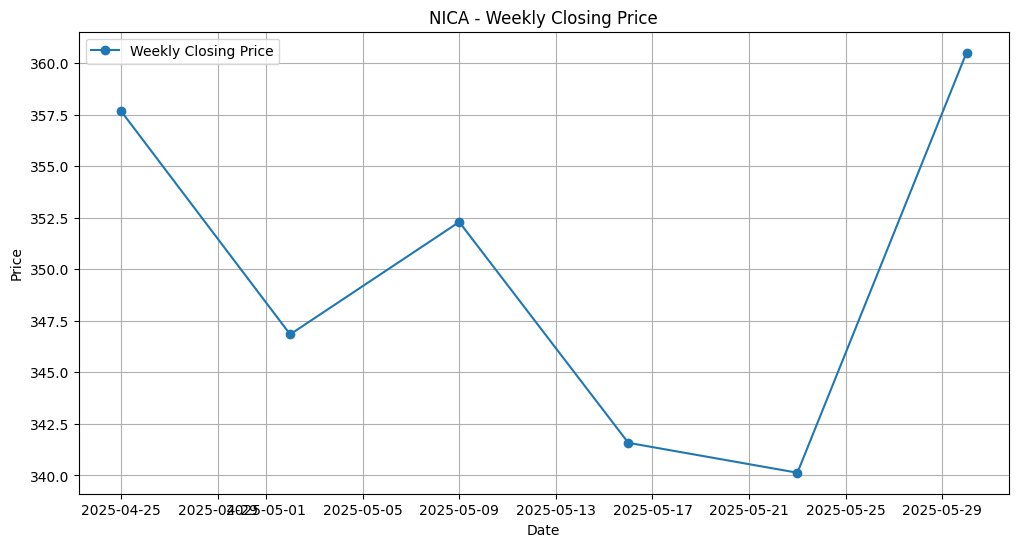

In [26]:
weekly = df.resample("W-FRI").agg({
    "closingPrice": "last",
    "maxPrice": "max",
    "minPrice": "min",
    "volume": "sum",
    "amount": "sum",
    "noOfTransactions": "sum"
}).dropna()

plt.figure(figsize=(12, 6))
plt.plot(weekly.index, weekly["closingPrice"], marker='o', label="Weekly Closing Price")
plt.title(f"{symbol} - Weekly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

### monthly plot

<ipython-input-27-728344fd0e11>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").agg({


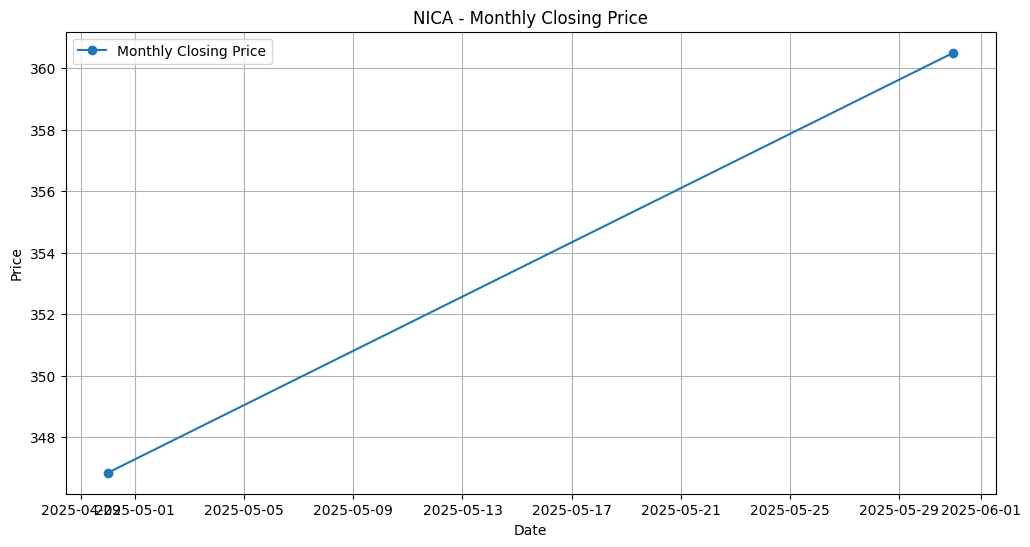

In [27]:
monthly = df.resample("M").agg({
    "closingPrice": "last",
    "maxPrice": "max",
    "minPrice": "min",
    "volume": "sum",
    "amount": "sum",
    "noOfTransactions": "sum"
}).dropna()

plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly["closingPrice"], marker='o', label="Monthly Closing Price")
plt.title(f"{symbol} - Monthly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

### moving averages

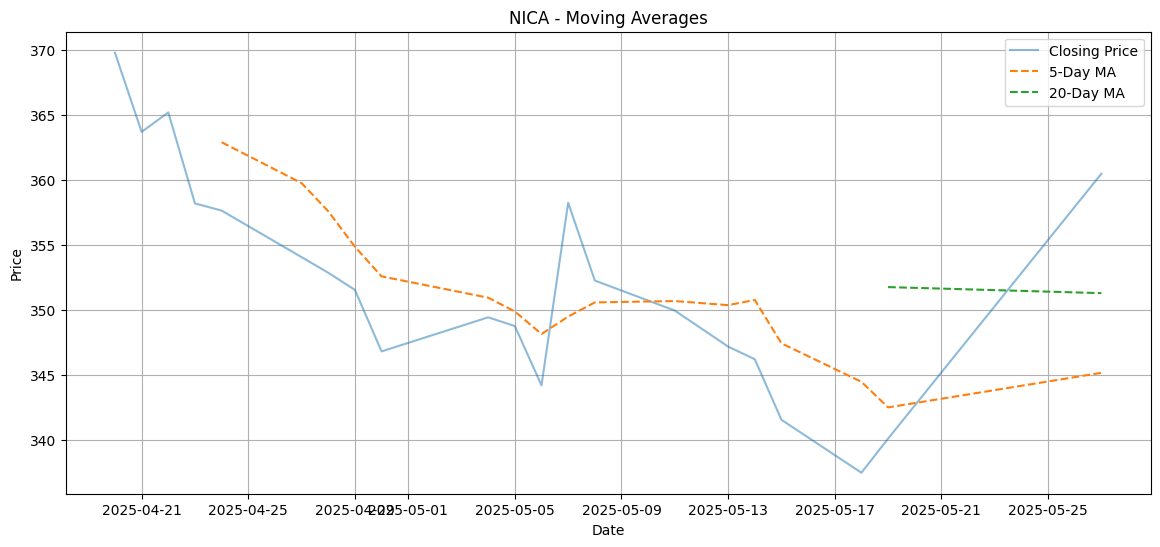

In [28]:
df["MA_5"] = df["closingPrice"].rolling(window=5).mean()
df["MA_20"] = df["closingPrice"].rolling(window=20).mean()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["MA_5"], label="5-Day MA", linestyle="--")
plt.plot(df.index, df["MA_20"], label="20-Day MA", linestyle="--")
plt.title(f"{symbol} - Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### weighted moving averages

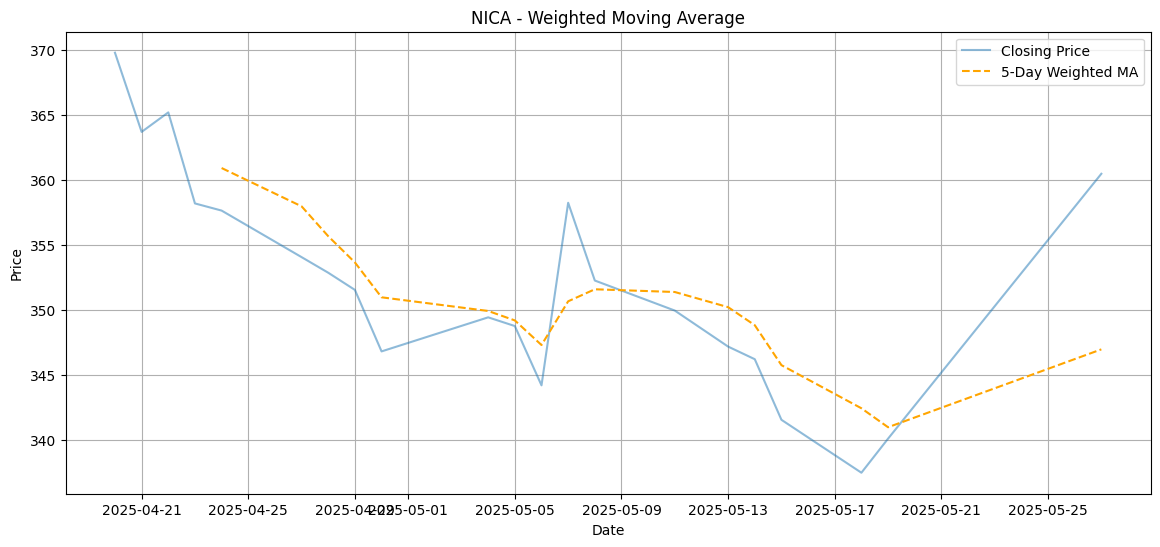

In [29]:
def weighted_moving_avg(values):
    weights = np.arange(1, len(values)+1)
    return np.dot(values, weights) / weights.sum()

df["WMA_5"] = df["closingPrice"].rolling(window=5).apply(weighted_moving_avg, raw=True)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["WMA_5"], label="5-Day Weighted MA", linestyle="--", color='orange')
plt.title(f"{symbol} - Weighted Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### RSI

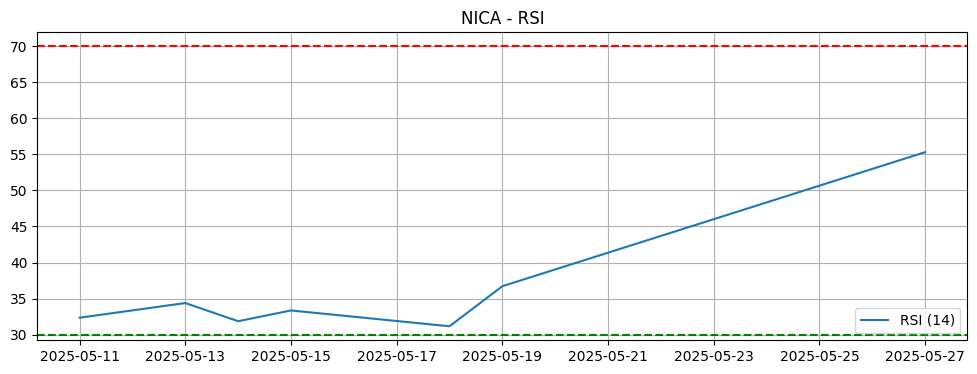

In [30]:
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df["RSI_14"] = compute_RSI(df["closingPrice"])

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["RSI_14"], label="RSI (14)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f"{symbol} - RSI")
plt.legend()
plt.grid(True)
plt.show()

### OBV

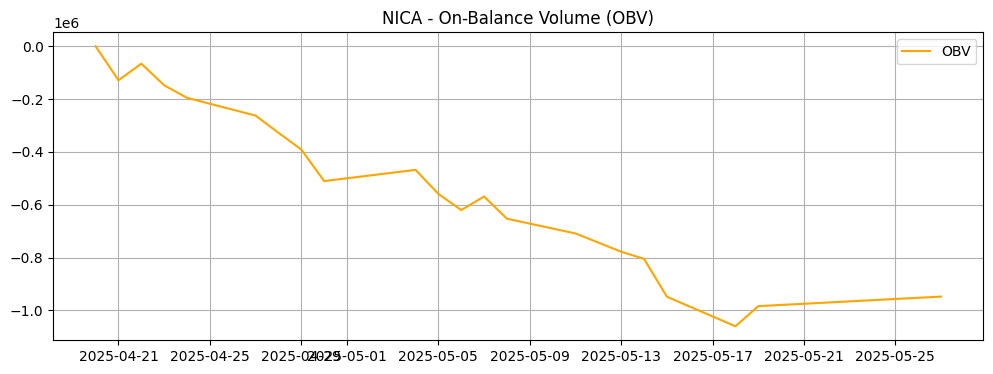

In [31]:
def compute_OBV(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['closingPrice'].iloc[i] > df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] + df['volume'].iloc[i])
        elif df['closingPrice'].iloc[i] < df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] - df['volume'].iloc[i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=df.index)

df["OBV"] = compute_OBV(df)

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["OBV"], label="OBV", color='orange')
plt.title(f"{symbol} - On-Balance Volume (OBV)")
plt.legend()
plt.grid(True)
plt.show()

### CCI

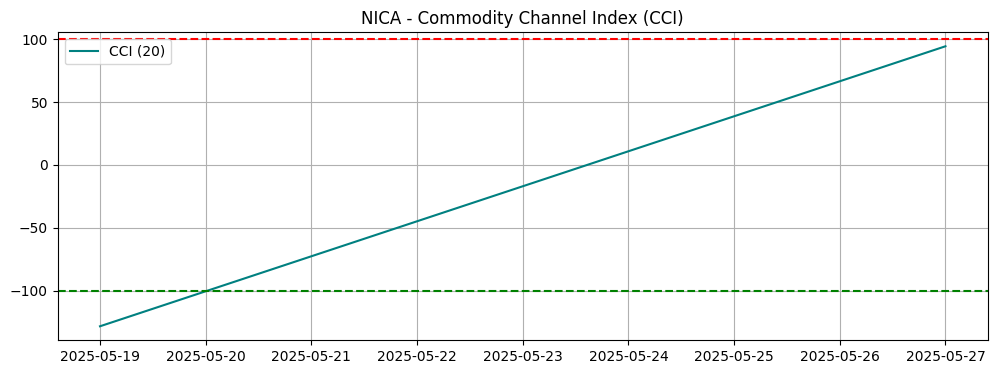

In [32]:
def compute_CCI(df, window=20):
    TP = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
    MA = TP.rolling(window=window).mean()
    MD = TP.rolling(window=window).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)
    return (TP - MA) / (0.015 * MD)

df["CCI_20"] = compute_CCI(df)

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["CCI_20"], label="CCI (20)", color='teal')
plt.axhline(100, color='red', linestyle='--')
plt.axhline(-100, color='green', linestyle='--')
plt.title(f"{symbol} - Commodity Channel Index (CCI)")
plt.legend()
plt.grid(True)
plt.show()